In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns

In [3]:
df = pd.read_csv('France_Energy_1965_2021.csv')
df.rename(columns={'Unnamed: 0':'annee'},inplace=True)
df

,annee,Coal,All_Fossil,Gas,GDP_per_cap,Life_exp,Other_renew,Solar,Wind,Hydro,Oil,Nuclear,Pop,Urban,Rural,All_renew
0,1965,481.135440,1168.4838,50.046993,13855.951,71.1034,0.000000,NaN,NaN,46.881092,637.30140,52.840233,48168800,33054437,16228319,46.881092
1,1966,445.814100,1181.7335,52.796500,14475.218,71.5098,0.390000,NaN,NaN,52.208470,683.12300,81.308180,48683090,33987676,15829365,52.598470
2,1967,440.042570,1285.1718,60.339252,15079.873,71.4927,0.605000,NaN,NaN,45.377660,784.79000,119.774560,49181404,34910161,15423851,45.982660
3,1968,423.160860,1345.7490,72.156494,15609.670,71.4792,0.926000,NaN,NaN,50.422610,850.43164,176.318530,49647270,35692859,15124161,51.348610
4,1969,423.603060,1490.1211,83.850494,16579.016,71.2021,1.067000,NaN,NaN,52.942090,982.66754,203.945980,50087056,36223125,15049558,54.009090
5,1970,403.171100,1615.0312,95.529250,17435.078,72.0902,1.370246,NaN,NaN,56.681484,1116.33080,320.742220,50523588,36752571,14971545,58.051730
6,1971,369.435150,1699.4092,113.225500,18326.459,72.0746,1.391822,NaN,NaN,48.856724,1216.74850,519.341060,50970696,37291038,14894184,50.248547
7,1972,328.612580,1813.4574,133.887740,19144.795,72.3163,1.515195,NaN,NaN,48.831467,1350.95720,805.327500,51410364,37825586,14812302,50.346662
8,1973,325.041780,1988.1039,157.036500,20371.342,72.4799,1.550086,NaN,NaN,47.696262,1506.02560,807.814900,51814076,38334453,14719207,49.246348
9,1974,329.006600,1923.9535,163.959240,21193.426,72.8103,1.577059,NaN,NaN,56.230286,1430.98770,800.172600,52163550,38806179,14609071,57.807345


In [4]:
data_a_rajouter = pd.read_csv('vote_ecologie.csv',delimiter=";")
data_a_rajouter[" Voix "] = data_a_rajouter[' Voix '].str.replace(' ', '').astype(float)
data_a_rajouter['Poucentage']=data_a_rajouter['Poucentage'].str.replace(',', '.').astype(float)

In [5]:
df2=df.merge(data_a_rajouter, how="left",on = 'annee')

<Axes: >

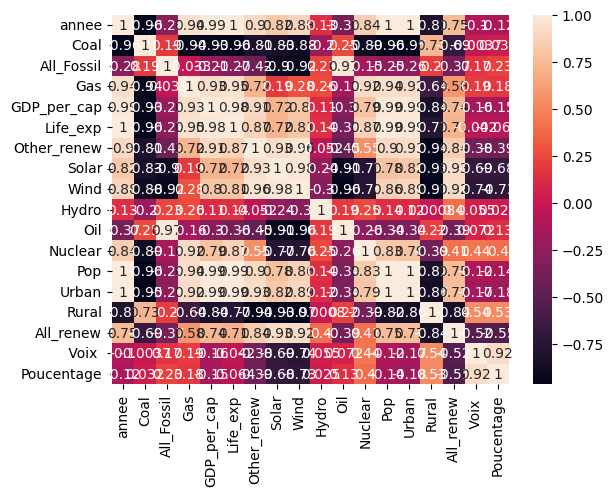

In [6]:
sns.heatmap(df2.corr(),annot=True)

In [7]:
df2['Temps'] = [i**2 for i in range(1, len(df)+1)]


In [8]:
df2.columns

Index(['annee', 'Coal', 'All_Fossil', 'Gas', 'GDP_per_cap', 'Life_exp',
       'Other_renew', 'Solar', 'Wind', 'Hydro', 'Oil', 'Nuclear', 'Pop',
       'Urban', 'Rural', 'All_renew', ' Voix ', 'Poucentage', 'Temps'],
      dtype='object')

In [19]:
model = sm.OLS.from_formula("All_renew ~ Temps+All_Fossil+GDP_per_cap+Poucentage",data=df2.fillna(0))
results = model.fit()

In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              All_renew   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     26.49
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           5.23e-12
Time:                        14:22:23   Log-Likelihood:                -212.60
No. Observations:                  57   AIC:                             435.2
Df Residuals:                      52   BIC:                             445.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      55.6880     14.672      3.795      0.000      26.246      85.130
Temps           0.0138      0.013      1.070      0.290      -0.012       0.040
All_Fossil      0.0012      0.014      0.087      0.931      -0.028       0.030
GDP_per_cap  7.882e-05      0.001      0.059      0.953      -0.003       0.003
Poucentage     -1.7665      0.920     -1.919      0.060      -3.613       0.080
==============================================================================
Omnibus:                        3.075   Durbin-Watson:                   0.835
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                1.703
Skew:                           0.106   Prob(JB):                        0.427
Kurtosis:                       2.180   Cond. No.                     3.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
df2['Prediction'] = results.predict()

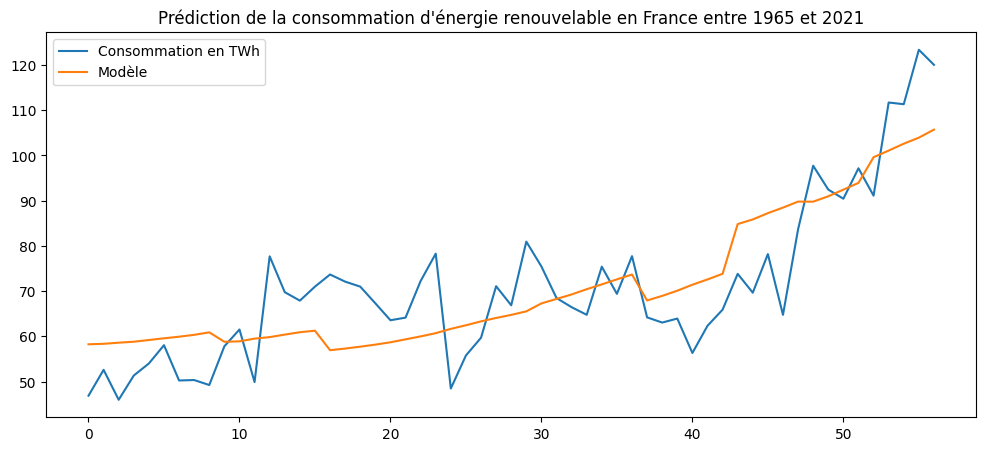

In [23]:


plt.figure(figsize=(12,5))
plt.title('Prédiction de la consommation d\'énergie renouvelable en France entre 1965 et 2021')
plt.plot(df2['All_renew'], label='Consommation en TWh')
plt.plot(df2['Prediction'], label='Modèle')
plt.legend(loc='best')
plt.show()